# 📰 Fake News Detector with Logistic Regression



In [22]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
dd = pd.read_csv('fake.csv')
dd.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:

df = pd.read_csv('fake_news.csv')  
df.head()

,title,text,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",fake
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,real
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,real
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",fake
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",real


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22708\3890408728.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='viridis')


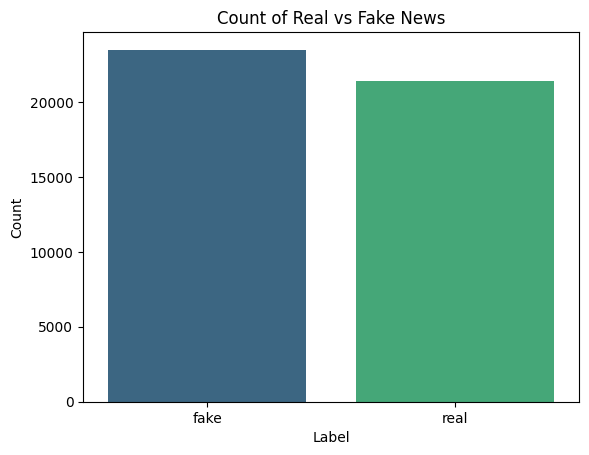

In [24]:

sns.countplot(data=df, x='label', palette='viridis')
plt.title("Count of Real vs Fake News")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

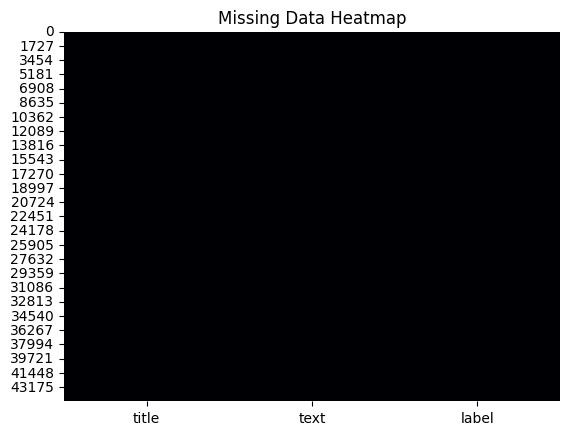

In [25]:

sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title("Missing Data Heatmap")
plt.show()

In [26]:

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df['text'] = df['text'].apply(clean_text)

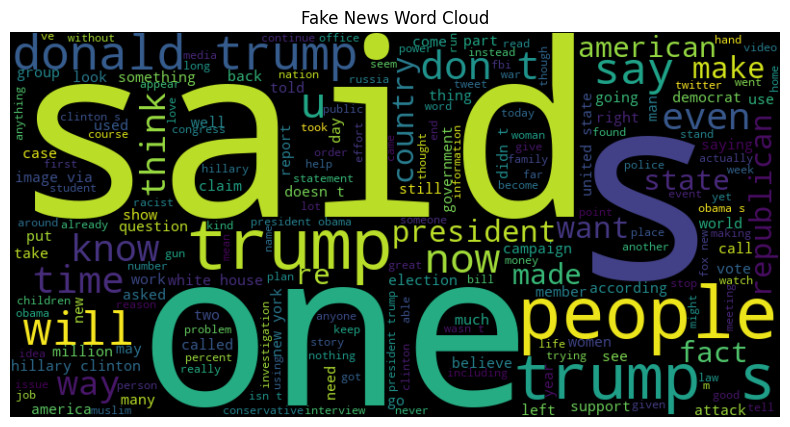

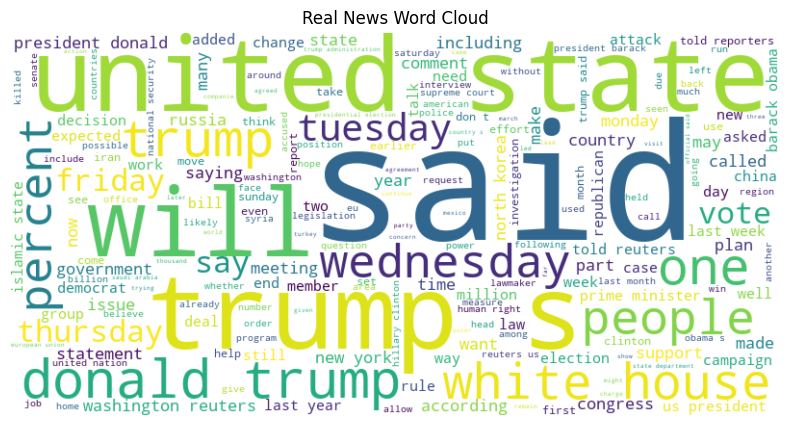

In [ ]:
# 📈 Word Clouds
fake_text = " ".join(df[df['label'] == 'fake']['text'])
real_text = " ".join(df[df['label'] == 'real']['text'])


wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.title("Fake News Word Cloud")
plt.show()


wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.title("Real News Word Cloud")
plt.show()

Uses of Word Clouds

Quickly identify prominent words

Larger words mean higher frequency, so you instantly see important keywords or themes.

Summarize large text datasets visually


Explore data during text analysis

Compare groups or categories

comparing word clouds of fake news vs. real news can reveal differences in word usage or topics.

Communicate insights effectively



In [30]:

X = df['text']
y = df['label'].map({'real': 0, 'fake': 1})

In [31]:
data_fake = df[df['label'] == 'fake'].copy()
data_true = df[df['label'] == 'real'].copy()


In [34]:
# Reserve the last 10 fake news articles for manual testing
data_fake_manual_testing = data_fake.tail(10)
data_fake = data_fake.drop(data_fake_manual_testing.index)

# Reserve the last 10 real news articles for manual testing
data_true_manual_testing = data_true.tail(10)
data_true = data_true.drop(data_true_manual_testing.index)


In [12]:
# 🔀 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [35]:

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

Creates a TF-IDF vectorizer instance (term frequency, inverse document frequency)

stop_words='english' removes common English stopwords (like “the”, “and”, “is”).

Accuracy: 0.9812917594654789

Confusion Matrix:


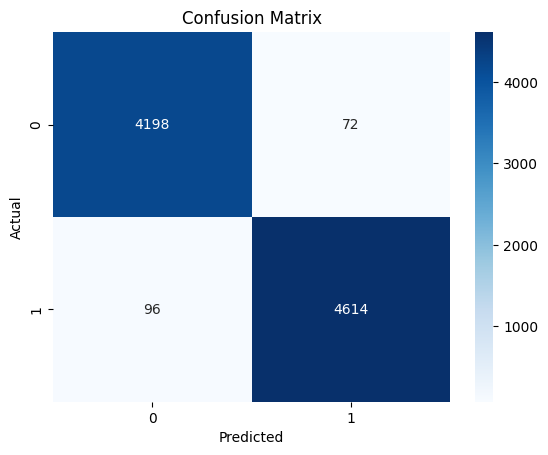


Classification Report:
               precision    recall  f1-score   support

        Real       0.98      0.98      0.98      4270
        Fake       0.98      0.98      0.98      4710

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [36]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Real', 'Fake']))

In [44]:

def predict_news(news_text):
    if not news_text.strip():
        return "Invalid input: text is empty."
    cleaned_text = clean_text(news_text)
    vect_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vect_text)[0]

    return "Fake" if prediction == 1 else "Real"
sample = """
U.S. President Bush spoke with Russian President Vladimir Putin by phone on Tuesday 
and discussed working together to resolve the Syrian crisis, the White House said in a statement.
"""

print("Prediction:", predict_news(sample))


Prediction: Real


In [43]:
sample = """NASA confirms Earth will experience 6 days of total darkness in December due to a solar storm."""
print("Prediction:", predict_news(sample))


Prediction: Fake


In [ ]:
samples = [
    "The government announced new economic policies today.",
    "NASA confirms Earth will experience 6 days of total darkness in December.",
    """
U.S. President Bush spoke with Russian President Vladimir Putin by phone on Tuesday 
and discussed working together to resolve the Syrian crisis, the White House said in a statement.
"""
]

for i, sample in enumerate(samples):
    print(f"Sample {i+1} prediction: {predict_news(sample)}")

Sample 1 prediction: Fake
Sample 2 prediction: Fake
Sample 3 prediction: Real


In [50]:
print("\n Testing Real News Samples")
for i, row in data_true_manual_testing.iterrows():
    print(f"\nSample {i}:\n", row["text"][:300], "...")
    print("Prediction:", predict_news(row["text"]))



 Testing Real News Samples

Sample 44874:
 beijing reuters  china has denied responsibility for alleged cyber attacks in the united states appearing to target exiled tycoon guo wengui who has levelled corruption allegations against senior communist party officials and applied for political asylum the ministry of public security said in a sta ...
Prediction: Real

Sample 44875:
 washington reuters  us president donald trump signed an executive order on friday to extend offshore oil and gas drilling to areas that have been off limits  a move meant to boost domestic production but which could fall flat due to weak industry demand for the acreage the order could open up swathe ...
Prediction: Real

Sample 44877:
 washington reuters  president donald trump on tuesday reaffirmed support for the united states’ longstanding security alliances around the world but insisted that friends and partners from europe to the middle east to the pacific must “pay their fair share of the cost” in his fir

In [49]:
from sklearn.metrics import accuracy_score, classification_report


reserved_texts = []
reserved_true_labels = []
reserved_predictions = []


for _, row in data_fake_manual_testing.iterrows():
    reserved_texts.append(row['text'])
    reserved_true_labels.append(1)  # Fake = 1
    reserved_predictions.append(1 if predict_news(row['text']) == "Fake" else 0)


for _, row in data_true_manual_testing.iterrows():
    reserved_texts.append(row['text'])
    reserved_true_labels.append(0)  # Real = 0
    reserved_predictions.append(1 if predict_news(row['text']) == "Fake" else 0)


print("🎯 Accuracy on Reserved Samples:", accuracy_score(reserved_true_labels, reserved_predictions))
print("\n📊 Classification Report:\n", classification_report(reserved_true_labels, reserved_predictions, target_names=["Real", "Fake"]))


🎯 Accuracy on Reserved Samples: 0.9

📊 Classification Report:
               precision    recall  f1-score   support

        Real       0.83      1.00      0.91        10
        Fake       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

